In [37]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
print(data.shape)
data.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Correlation analysis

#### 1. Purchase and other numeric features

Gender is categorical, but we can convert the column into binary form

In [3]:
data1 = data
data1['GenderInt'] = (data1['Gender'] == 'F').astype(int)
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,0


In [4]:
numeric_features = data1.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
GenderInt               int32
dtype: object

In [5]:
#Purchase 와 나머지 feature 간의 correlation
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
GenderInt            -0.060086
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



Occupation has the biggest correlation value with 'purchase', but still the correlation value is low. There does not seem to be any predictor that would have a high impact on Purchase. 

How about converting age-group into numeric values?

In [6]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data2 = data1
data2["AgeInt"] = data1["Age"].apply(lambda line: age_dict[line])


In [7]:
data2[["User_ID", "Age", "AgeInt"]].head()

,User_ID,Age,AgeInt
0,1000001,0-17,0
1,1000001,0-17,0
2,1000001,0-17,0
3,1000001,0-17,0
4,1000002,55+,6


Column "AgeInt" has numerical values. The table below is the correlation between 'purchase' and other numerical values including 'AgeInt'

In [8]:
#Purchase 와 나머지 feature 간의 correlation - Age 에 대해서 추가
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.021104
AgeInt                0.017717
User_ID               0.005389
Marital_Status        0.000129
Product_Category_3   -0.022257
GenderInt            -0.060086
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64 



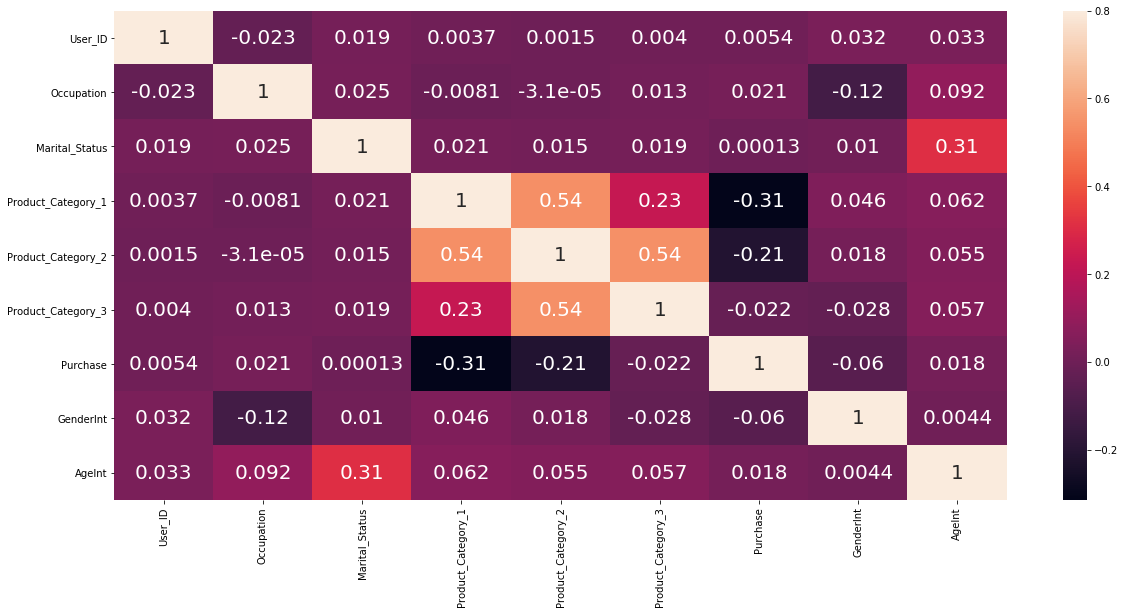

In [9]:
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

Correlation value between Product_catgory 1, 2 and 3 is high. So, we'll just deal with the Product_category 1 in correlation analysis.

Above results are the correlations between purchase and other features. User 마다 purchase 합계를 이용하겠다.

In [10]:
# user 기준으로 정렬
data2_sort = data2.sort_values(["User_ID"], ascending=[True])
# 정렬한 data 의 index 를 재설정
data2_sort = data2_sort.reset_index(drop = True)
data2_sort

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1,0
1,1000001,P00255842,F,0-17,10,A,2,0,16,NaN,NaN,16446,1,0
2,1000001,P0097142,F,0-17,10,A,2,0,12,NaN,NaN,1715,1,0
3,1000001,P00289942,F,0-17,10,A,2,0,3,4.0,5.0,10900,1,0
4,1000001,P00210342,F,0-17,10,A,2,0,3,4.0,NaN,11039,1,0
5,1000001,P00248442,F,0-17,10,A,2,0,3,4.0,NaN,7943,1,0
6,1000001,P00051442,F,0-17,10,A,2,0,8,17.0,NaN,9938,1,0
7,1000001,P00183942,F,0-17,10,A,2,0,3,4.0,NaN,10872,1,0
8,1000001,P00178342,F,0-17,10,A,2,0,8,NaN,NaN,7887,1,0
9,1000001,P00058142,F,0-17,10,A,2,0,3,4.0,12.0,11051,1,0


정렬한 data2_sort 에서 user 별로 purchase 의 합계를 구한다

In [11]:
# create user_id array. only unique value. remove duplicate ones
user_ids = list(set(data2_sort["User_ID"]))
sum_data = data2_sort

# sum_purchase 를 저장할 dataframe
del_columns = ['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sum_data.drop(del_columns, axis=1, inplace = True)

#sum_data 에 대해 user_id 기준 행 중복 제거. 첫번째 행만 남기고 지움.
sum_data = sum_data.drop_duplicates(["User_ID"], keep="first")
sum_data = sum_data.reset_index(drop = True)
# sum_data.columns.str.replace('Purchase','sum_Purchase')

sum_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,GenderInt,AgeInt
0,1000001,F,0-17,10,A,2,0,8370,1,0
1,1000002,M,55+,16,C,4+,0,5260,0,6
2,1000003,M,26-35,15,A,3,0,3938,0,2
3,1000004,M,46-50,7,B,2,1,3849,0,4
4,1000005,M,26-35,20,A,1,1,15466,0,2


In [24]:
user_num = len(user_ids)
#sum_data 에 각 user 별로 소비 금액 계산
for idx in range(user_num):
    filters = data2_sort[data2_sort['User_ID'].isin([user_ids[idx]])]
    sum_purchase = 0 
    for index, row in filters.iterrows() :
        sum_purchase += row['Purchase']
        
    sum_data.at[sum_data.index[idx], 'sum_Purchase'] = sum_purchase

sum_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,GenderInt,AgeInt,sum_Purchase
0,1000001,F,0-17,10,A,2,0,8370,1,0,333481.0
1,1000002,M,55+,16,C,4+,0,5260,0,6,810353.0
2,1000003,M,26-35,15,A,3,0,3938,0,2,341635.0
3,1000004,M,46-50,7,B,2,1,3849,0,4,205987.0
4,1000005,M,26-35,20,A,1,1,15466,0,2,821001.0


sum_data 에 sum_Purchase 가 저장. 구매 금액 합계와의 correlation 계산. Product 와 관련된 column drop

In [28]:
sum_data.drop('Purchase', axis = 1, inplace = True)
sum_data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,GenderInt,AgeInt,sum_Purchase
0,1000001,F,0-17,10,A,2,0,1,0,333481.0
1,1000002,M,55+,16,C,4+,0,0,6,810353.0
2,1000003,M,26-35,15,A,3,0,0,2,341635.0
3,1000004,M,46-50,7,B,2,1,0,4,205987.0
4,1000005,M,26-35,20,A,1,1,0,2,821001.0


In [29]:
# sum_Purchase 와 나머지 feature 간의 correlation
# Stay_In_Current_City_Years 와 City_Category 도 numerical value 로 convert
sum_data.apply(lambda x: len(x.unique()))

User_ID                       5891
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
GenderInt                        2
AgeInt                           7
sum_Purchase                  5877
dtype: int64

In [30]:
#City_Category 에는 A, B, C 값이 있음.
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
sum_data["City_Category"] = sum_data["City_Category"].apply(lambda line: city_dict[line])
sum_data[["User_ID", "City_Category"]].head()


,User_ID,City_Category
0,1000001,0
1,1000002,2
2,1000003,0
3,1000004,1
4,1000005,0


Convert Stay_In_Current_City_Years into numerical vals

In [32]:
#Number of times each value appears in the column
frequency = sum_data['Stay_In_Current_City_Years'].value_counts()
print("Frequency distribution for Stay_In_Current_City_Years\n")
print(frequency)

Frequency distribution for Stay_In_Current_City_Years

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64


In [34]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
sum_data["Stay_In_Current_City_Years"] = sum_data["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
sum_data[["User_ID", "Stay_In_Current_City_Years"]].head()

,User_ID,Stay_In_Current_City_Years
0,1000001,2
1,1000002,4
2,1000003,3
3,1000004,2
4,1000005,1


sum_data 의 user 와 관련된 feature 에 대해 numerical value 로 바꿈. 

sum_data 내에서 sum_Purchase 와 나머지 feature 사이의 correlation

In [35]:
numeric_features = sum_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['sum_Purchase'].sort_values(ascending=False)[:10],'\n')

sum_Purchase                  1.000000
Stay_In_Current_City_Years    0.003296
Occupation                    0.000419
User_ID                      -0.014669
Marital_Status               -0.020592
AgeInt                       -0.068740
GenderInt                    -0.102781
City_Category                -0.343058
Name: sum_Purchase, dtype: float64 



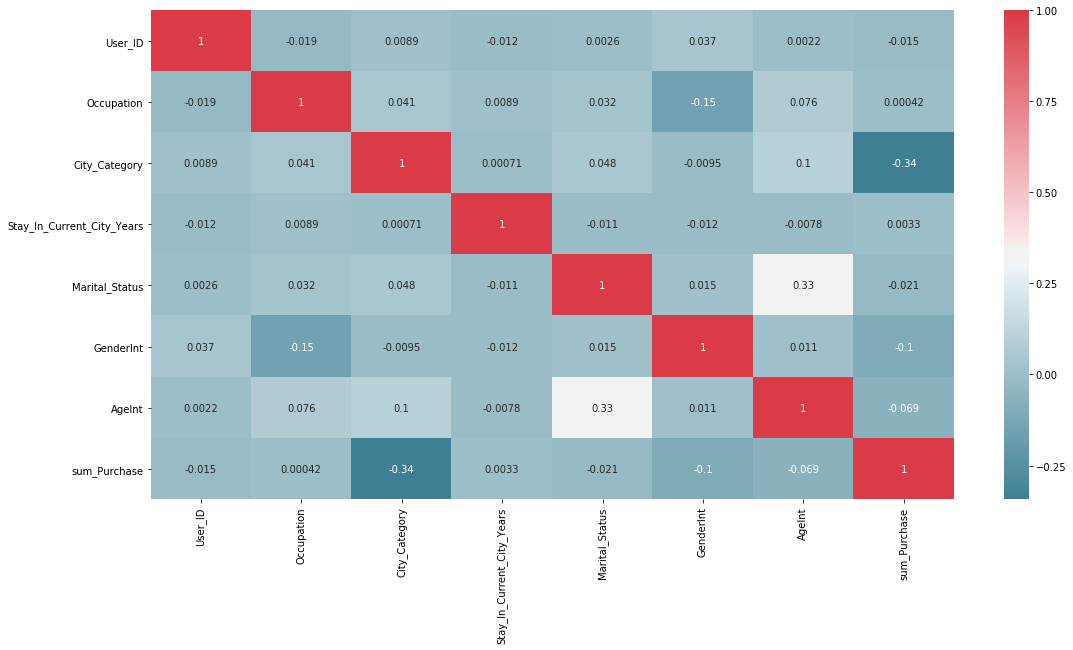

In [48]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = sum_data.corr(method = 'pearson')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

# corrmat = data2.corr(method = 'pearson')
# f, ax = plt.subplots(figsize=(20, 9))
# sns.heatmap(corrmat, vmax=.8, annot_kws={'size': 20}, annot=True) 

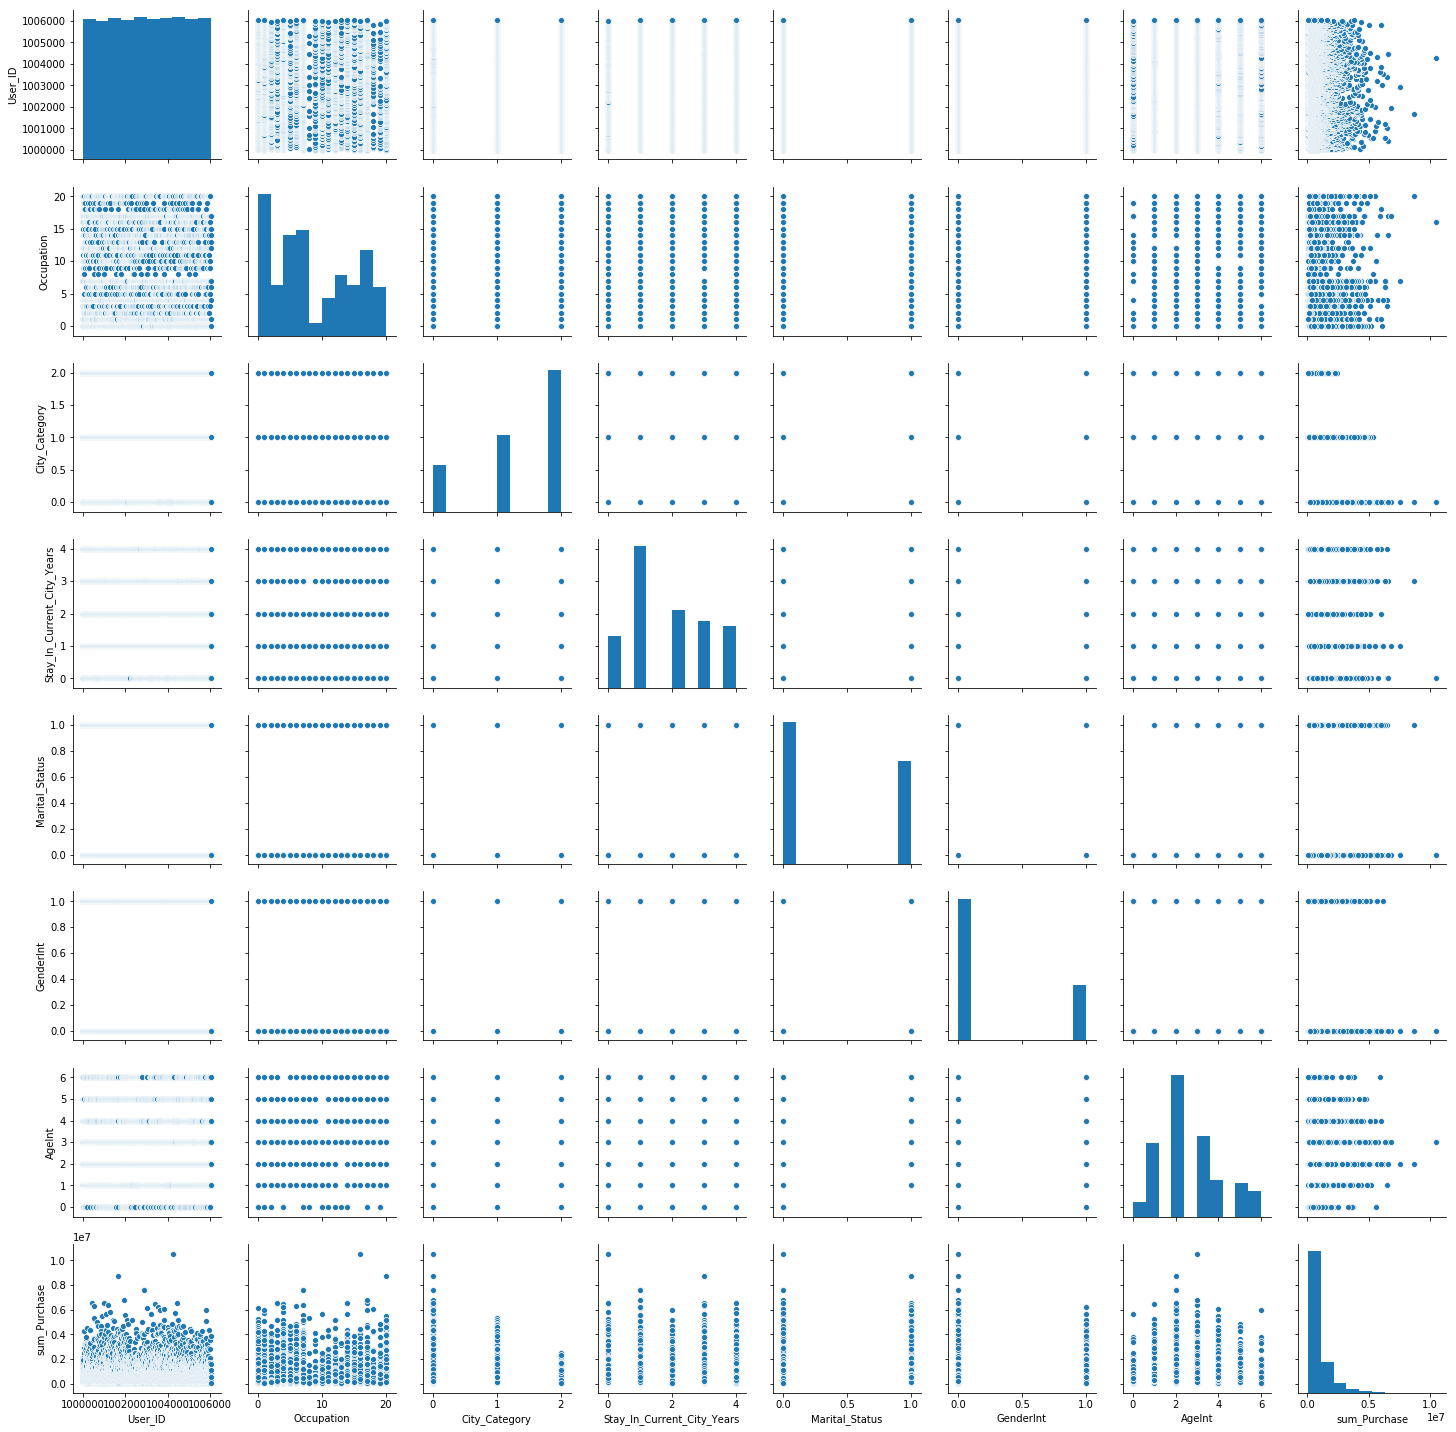

In [46]:
sns.pairplot(sum_data)

#### 2. Significance of correlation of 1.

In [ ]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr
def corr_significanece(data):
    if data = "data2"
    
column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Purchase"], data2[col])
    print("<"+ col + ">")
    print("Pearson Correlation Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

#### 2. Product_Category and other features

Just use the 'Product_Category_1' feature

In [13]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data2.drop(del_columns, inplace=True, axis=1)
data2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,GenderInt,AgeInt
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,0,6


In [14]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1    1.000000
AgeInt                0.061951
GenderInt             0.045661
Marital_Status        0.020546
User_ID               0.003687
Occupation           -0.008114
Purchase             -0.314125
Name: Product_Category_1, dtype: float64 



Convert City_Category into numeric values

In [15]:
data2.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
GenderInt                         2
AgeInt                            7
dtype: int64

In [16]:
#City_Category 에는 A, B, C 값이 있음.
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data2["City_Category"] = data2["City_Category"].apply(lambda line: city_dict[line])
data2[["User_ID", "City_Category"]].head()


,User_ID,City_Category
0,1000001,0
1,1000001,0
2,1000001,0
3,1000001,0
4,1000002,2


Convert Stay_In_Current_City_Years into numerical vals

In [17]:
#Number of times each value appears in the column
frequency = data2['Stay_In_Current_City_Years'].value_counts()
print("Frequency distribution for Stay_In_Current_City_Years\n")
print(frequency)

Frequency distribution for Stay_In_Current_City_Years

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64


In [18]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data2["Stay_In_Current_City_Years"] = data2["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data2[["User_ID", "Stay_In_Current_City_Years"]].head()

,User_ID,Stay_In_Current_City_Years
0,1000001,2
1,1000001,2
2,1000001,2
3,1000001,2
4,1000002,4


In [19]:
numeric_features = data2.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n')

Product_Category_1            1.000000
AgeInt                        0.061951
GenderInt                     0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



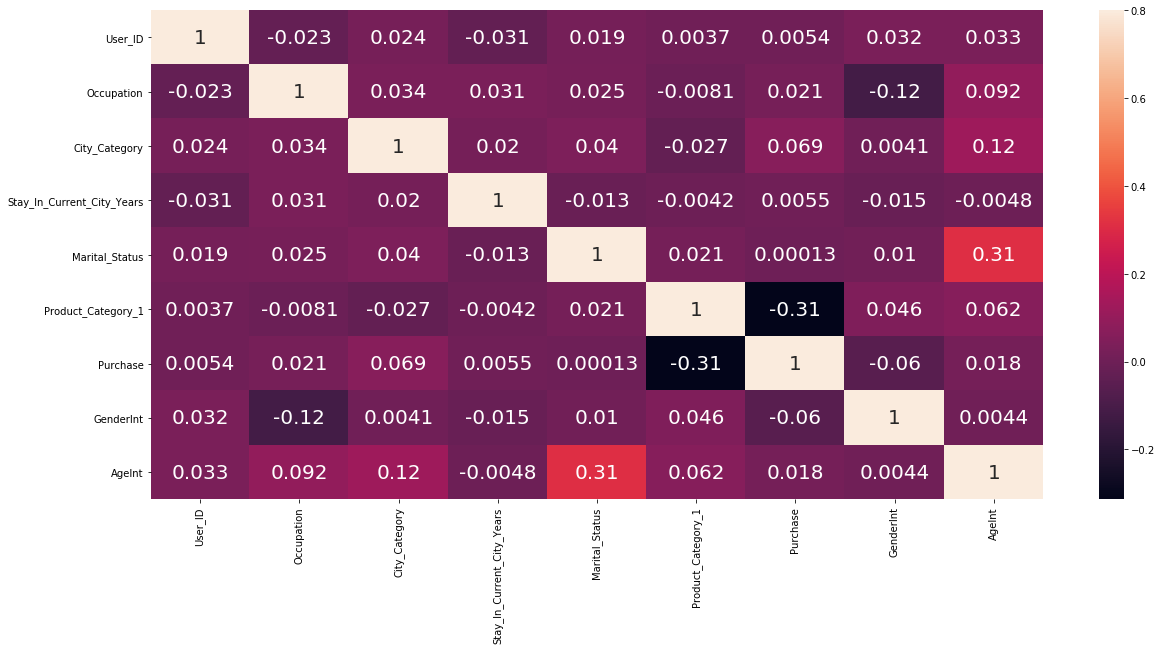

In [20]:
# 다시 전체에 대해서 pearson correlation 을 구해보겠다.
corrmat = data2.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8,annot_kws={'size': 20}, annot=True) 

#### 3. Significance of correlation

Even small correlations become significant with large-enough sample sizes

In [21]:
#instead of Numpy, can we use here Numpy and Scipy both library 
#to get the addition p value or in the existing  script can we add this function
#to obtain the p Value as a raster

from scipy.stats import pearsonr

column = {"Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Purchase", "GenderInt", "AgeInt"} 
print("**Pearson Correlation Coefficient and p-value between Purchase and other features")
print()
alpha = 0.05
for col in column :
    coef, p_val = pearsonr(data2["Purchase"], data2[col])
    print("<"+ col + ">")
    print("Pearson Correlation Coefficient: %.3f" % coef)
    print("p-value: %.3f" % p_val)
    
    if p_val > alpha:
        print('-> uncorrelated (fail to reject H0)')
    else: 
         print('-> correlated (reject H0)')
    print()

**Pearson Correlation Coefficient and p-value between Purchase and other features

<GenderInt>
Pearson Correlation Coefficient: -0.060
p-value: 0.000
-> correlated (reject H0)

<City_Category>
Pearson Correlation Coefficient: 0.069
p-value: 0.000
-> correlated (reject H0)

<Marital_Status>
Pearson Correlation Coefficient: 0.000
p-value: 0.925
-> uncorrelated (fail to reject H0)

<Stay_In_Current_City_Years>
Pearson Correlation Coefficient: 0.005
p-value: 0.000
-> correlated (reject H0)

<Occupation>
Pearson Correlation Coefficient: 0.021
p-value: 0.000
-> correlated (reject H0)

<AgeInt>
Pearson Correlation Coefficient: 0.018
p-value: 0.000
-> correlated (reject H0)

<Product_Category_1>
Pearson Correlation Coefficient: -0.314
p-value: 0.000
-> correlated (reject H0)

<Purchase>
Pearson Correlation Coefficient: 1.000
p-value: 0.000
-> correlated (reject H0)



#### 4. Spearman correlation analysis between purchase and other values

Spearman correlation between purchase and other values

In [22]:
#calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
#ageint, stay_in_current_city_years
coef, p = spearmanr(data2["Purchase"], data2["AgeInt"])
print("Spearman's correlation coefficient between purchase and ageint: %.3f\n" % coef)
coef, p = spearmanr(data2["Purchase"], data2["Stay_In_Current_City_Years"])
print("Spearman's correlation coefficient between purchase and stay_in_current_city_years: %.3f" % coef)

Spearman's correlation coefficient between purchase and ageint: 0.022

Spearman's correlation coefficient between purchase and stay_in_current_city_years: 0.006


Get the sum of purchase of each user and then get the spearman correlation

#### Occupation

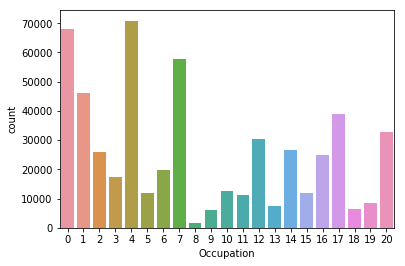

In [23]:
sns.countplot(data.Occupation)